## Стратегия возврата к среднему значению (Mean reversion) использую полосы Боллинджера (Bollinger Bands)
Торговля по принципу средней реверсии предполагает, что цены вернутся к среднему значению. Таким образом, всякий раз, когда цены слишком далеки от среднего значения, мы будем занимать позицию (длинную или короткую) и закрывать позицию, когда цена возвращается к среднему значению.
Полосами Боллинджера называются следующие триобъекта: центральная полоса - это скользящее среднее за несколько последних торговых дней. Верхняя полоса - это сумма стандартного отклонения за несколько последних торговых дней,домноженногона коэффициент, который определяется заранее, и средней полосы. Нижняя полоса, соответственно получается за счёт вычитания из средней полосы стандартного отклонения за несколько последних торговых
дней, домноженное на коэффициент. Как правило коэффициенты для верхней и нижней полосы совпадают. 
В приведенном ниже примере Стратегия восстановления реализуется на валютной паре EURCHF (Евро - Швейцарский Франк).

### Загружаем необходимые библиотеки

In [22]:
import pandas as pd
import pandas_datareader as dr
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.tsa.stattools as ts
import statsmodels.tsa.vector_ar.vecm as vm
from numpy.linalg import inv
from statsmodels.api import OLS
from statsmodels.tsa.stattools import coint
from scipy.stats import pearsonr
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller

### Сырые финансовые данные, которые мы используем находятся в формате csv файла
Для того, чтобы прочатать эти данные в питоне используется команда "pandas.read_csv()".

Syntax: pd.read_csv(filename)
filename: Name of the file in the string format

In [23]:
SBSP = dr.get_data_moex('SBSP')
SBSP = SBSP.loc[SBSP['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

FXDE = dr.get_data_moex('FXDE').loc[:,['CLOSE']]

FXIT = dr.get_data_moex('FXIT')
FXIT = FXIT.loc[FXIT['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

SBCB = dr.get_data_moex('SBCB')
SBCB = SBCB.loc[SBCB['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

RUSB = dr.get_data_moex('RUSB').loc[:,['CLOSE']]
RUSE = dr.get_data_moex('RUSE').loc[:,['CLOSE']]
FXAU = dr.get_data_moex('FXAU')#давно торгуется
FXAU = FXAU.loc[FXAU['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

FXCN = dr.get_data_moex('FXCN')
FXCN = FXCN.loc[FXCN['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

FXGD = dr.get_data_moex('FXGD')
FXGD = FXGD.loc[FXGD['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

FXJP = dr.get_data_moex('FXJP')
FXJP = FXJP.loc[FXJP['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

FXKZ = dr.get_data_moex('FXKZ').loc[:,['CLOSE']]
FXMM = dr.get_data_moex('FXMM').loc[:,['CLOSE']]
FXRB = dr.get_data_moex('FXRB').loc[:,['CLOSE']]

FXRL = dr.get_data_moex('FXRL')
FXRL = FXRL.loc[FXRL['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

FXRU = dr.get_data_moex('FXRU')
FXRU = FXRU.loc[FXRU['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

FXUK = dr.get_data_moex('FXUK').loc[:,['CLOSE']]

FXUS = dr.get_data_moex('FXUS')
FXUS = FXUS.loc[FXUS['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

FXTB = dr.get_data_moex('FXTB')
FXTB = FXTB.loc[FXTB['BOARDID']=='TQTF',:].loc[:,['CLOSE']]

FXWO = dr.get_data_moex('FXWO').loc[:,['CLOSE']]
FXRW = dr.get_data_moex('FXRW').loc[:,['CLOSE']]


df=pd.merge(SBSP, FXDE,  on='TRADEDATE', suffixes=('_SBSP', '_FXDE'))

df=pd.merge(df, FXIT, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXIT"}, inplace=True)

df=pd.merge(df, SBCB, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_SBCB"}, inplace=True)

df=pd.merge(df, RUSB, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_RUSB"}, inplace=True)

df=pd.merge(df, RUSE, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_RUSE"}, inplace=True)

df=pd.merge(df, FXAU, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXAU"}, inplace=True)

df=pd.merge(df, FXCN, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXCN"}, inplace=True)

df=pd.merge(df, FXGD, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXGD"}, inplace=True)

df=pd.merge(df, FXJP, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXJP"}, inplace=True)

df=pd.merge(df, FXKZ, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXKZ"}, inplace=True)

df=pd.merge(df, FXMM, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXMM"}, inplace=True)

df=pd.merge(df, FXRB, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXRB"}, inplace=True)

df=pd.merge(df, FXRL, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXRL"}, inplace=True)

df=pd.merge(df, FXRU, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXRU"}, inplace=True)

df=pd.merge(df, FXUK, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXUK"}, inplace=True)

df=pd.merge(df, FXUS, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXUS"}, inplace=True)

df=pd.merge(df, FXTB, on='TRADEDATE')
df.rename(columns={"CLOSE": "CLOSE_FXTB"}, inplace=True)

SBSP.rename(columns={"CLOSE": "CLOSE_SBSP"}, inplace=True)
FXDE.rename(columns={"CLOSE": "CLOSE_FXDE"}, inplace=True)
FXIT.rename(columns={"CLOSE": "CLOSE_FXIT"}, inplace=True)
SBCB.rename(columns={"CLOSE": "CLOSE_SBCB"}, inplace=True)
RUSB.rename(columns={"CLOSE": "CLOSE_RUSB"}, inplace=True)
RUSE.rename(columns={"CLOSE": "CLOSE_RUSE"}, inplace=True)
FXAU.rename(columns={"CLOSE": "CLOSE_FXAU"}, inplace=True)
FXCN.rename(columns={"CLOSE": "CLOSE_FXCN"}, inplace=True)
FXGD.rename(columns={"CLOSE": "CLOSE_FXGD"}, inplace=True)
FXJP.rename(columns={"CLOSE": "CLOSE_FXJP"}, inplace=True)
FXKZ.rename(columns={"CLOSE": "CLOSE_FXKZ"}, inplace=True)
FXMM.rename(columns={"CLOSE": "CLOSE_FXMM"}, inplace=True)
FXRB.rename(columns={"CLOSE": "CLOSE_FXRB"}, inplace=True)
FXRL.rename(columns={"CLOSE": "CLOSE_FXRL"}, inplace=True)
FXRU.rename(columns={"CLOSE": "CLOSE_FXRU"}, inplace=True)
FXUK.rename(columns={"CLOSE": "CLOSE_FXUK"}, inplace=True)
FXUS.rename(columns={"CLOSE": "CLOSE_FXUS"}, inplace=True)
FXTB.rename(columns={"CLOSE": "CLOSE_FXTB"}, inplace=True)
FXWO.rename(columns={"CLOSE": "CLOSE_FXWO"}, inplace=True)
FXRW.rename(columns={"CLOSE": "CLOSE_FXRW"}, inplace=True)

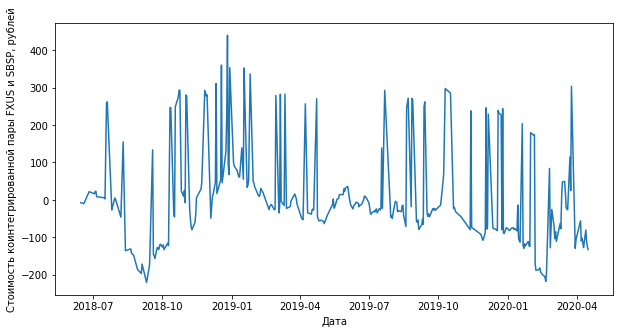

In [24]:
#df = pd.read_csv('data\EURCHF_new.csv',parse_dates=True,index_col=0,header=0)
df = pd.merge(FXMM, FXUS,  on='TRADEDATE')
model=OLS(df.CLOSE_FXMM, df.CLOSE_FXUS)
results=model.fit()
hedgeRatio=results.params
hedgeRatio

df=df.CLOSE_FXMM-hedgeRatio[0]*df.CLOSE_FXUS
plt.figure(figsize=(10,5))
plt.xlabel('Дата')
plt.ylabel('Стоимость коинтегрированной пары FXUS и SBSP, рублей')
plt.plot(df)

In [25]:
type(df)
df = df.to_frame()

In [26]:
df.rename(columns={0: "Price"}, inplace=True)

Поскольку не всегда данные расположены в хронологическом порядке, то их необходимо правильно отсортировать, следующая команда делает сортировку по дате

### Скользящее среднее и скользящее стандартное отклонение
Скользящее среднее вычисляется с использованием библиотеки pandas с помощью функции rolling().mean():

### DataFrame.column_name.rolling(lookback_period).mean()
Скользящее стандартное отклонение вычисляется с использованием библиотеки pandas с помощью функции rolling().std() function as shown below:

Синтаксис:
DataFrame.column_name.rolling(lookback_period).std()

In [27]:
# Период, за который рассматривается скользящее значение
lookback=5
# Скользящее среднее
df['moving_average'] = df['Price'].rolling(lookback).mean()

# Скользящее стандартное отклонение
df['moving_std_dev'] = df['Price'].rolling(lookback).std()
df.head(7)

,Price,moving_average,moving_std_dev
TRADEDATE,,,
2018-06-15,-7.344915,NaN,NaN
2018-06-19,-10.109049,NaN,NaN
2018-06-26,21.867069,NaN,NaN
2018-07-03,16.206192,NaN,NaN
2018-07-04,22.368154,8.597490,16.028881
2018-07-05,22.668154,14.600104,14.065619
2018-07-06,8.312705,18.284455,6.174211


Удалим лишние столбцы для удобства

### Верхняя линия Боллинджера (Upper band) и нижняя линяя Боллинджера (lower band)
Верхняя линия - это сумма половины (пологаем, что коэффициент 0.5) стандартного отклонения и скользящего среднего,аналогично нижняя линия получается путём вычитания из скользящего среднего половины скользящего стандартного отклонения.

In [28]:
df['upper_band'] = df.moving_average + 0.5*df.moving_std_dev
df['lower_band'] = df.moving_average - 0.5*df.moving_std_dev

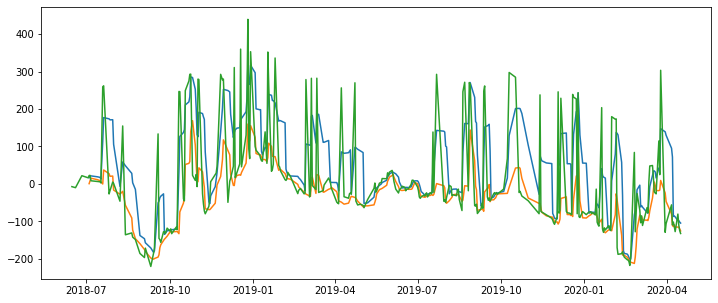

In [29]:
plt.figure(figsize=(12,5))
plt.plot(df['upper_band'])
plt.plot(df['lower_band'])
plt.plot(df['Price'])
plt.show()

### Открытие позициина покупку (Long entry) и закрытие позиции на покупку (long exit)
Колонка Long_entry содержит значение True, если цена находится ниже нижней линии Боллинджера и значение False иначе.

Колонка Long_exit содержит значение True, если цена вернулась к скользящему среднему значению, то есть сравнялась с ним или превысила (Price >= moving average) и значение False иначе.

In [30]:
df['long_entry'] = df.Price < df.lower_band   
df['long_exit'] = df.Price >= df.moving_average
df.head(7)

,Price,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit
TRADEDATE,,,,,,,
2018-06-15,-7.344915,NaN,NaN,NaN,NaN,False,False
2018-06-19,-10.109049,NaN,NaN,NaN,NaN,False,False
2018-06-26,21.867069,NaN,NaN,NaN,NaN,False,False
2018-07-03,16.206192,NaN,NaN,NaN,NaN,False,False
2018-07-04,22.368154,8.597490,16.028881,16.611931,0.583050,False,True
2018-07-05,22.668154,14.600104,14.065619,21.632914,7.567295,False,True
2018-07-06,8.312705,18.284455,6.174211,21.371560,15.197349,True,False


### Открытие короткой позиции (Short entry) и закрытие короткой позиции (short exit)
В колонке Short entry находится значение True, если цена превысила верхнюю полосу Боллинджера и значение False иначе.

В колонке Short exit расположим значение True, если цена вернулась к своему скользящему среднему, то есть выполнилось условие (Price <= moving average) и значение False иначе.

In [31]:
df['short_entry'] = df.Price > df.upper_band   
df['short_exit'] = df.Price <= df.moving_average
df.head(7)

,Price,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,short_entry,short_exit
TRADEDATE,,,,,,,,,
2018-06-15,-7.344915,NaN,NaN,NaN,NaN,False,False,False,False
2018-06-19,-10.109049,NaN,NaN,NaN,NaN,False,False,False,False
2018-06-26,21.867069,NaN,NaN,NaN,NaN,False,False,False,False
2018-07-03,16.206192,NaN,NaN,NaN,NaN,False,False,False,False
2018-07-04,22.368154,8.597490,16.028881,16.611931,0.583050,False,True,True,False
2018-07-05,22.668154,14.600104,14.065619,21.632914,7.567295,False,True,True,False
2018-07-06,8.312705,18.284455,6.174211,21.371560,15.197349,True,False,False,True


### Длинные позиции (Long positions) и короткие позиции (short positions)
Столбцы длинных и коротких позиций (positions_long, positions_short) начинаются со значений NaN (инициализация). 
1 соответствуют открытой длинной позиции (в столбце long_entry значение True), в столбце Диинная позиция (positions_long). 0 в столбце длинной позиции, если в столбце закрытия длинной позиции (long_exit) находится True.
Аналогичным образом, -1 и 0 в столбце короткой позиции (positions_short).

In [32]:
df['positions_long'] = np.nan  
df.loc[df.long_entry,'positions_long']= 1  
df.loc[df.long_exit,'positions_long']= 0  
  
df['positions_short'] = np.nan  
df.loc[df.short_entry,'positions_short']= -1  
df.loc[df.short_exit,'positions_short']= 0  

df.head(7)

,Price,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,short_entry,short_exit,positions_long,positions_short
TRADEDATE,,,,,,,,,,,
2018-06-15,-7.344915,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
2018-06-19,-10.109049,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
2018-06-26,21.867069,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
2018-07-03,16.206192,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
2018-07-04,22.368154,8.597490,16.028881,16.611931,0.583050,False,True,True,False,0.0,-1.0
2018-07-05,22.668154,14.600104,14.065619,21.632914,7.567295,False,True,True,False,0.0,-1.0
2018-07-06,8.312705,18.284455,6.174211,21.371560,15.197349,True,False,False,True,1.0,0.0


### Устраним NaN значения
DataFrame.fillna() - специальная функция, которая позволяет справиться с этой задачей method = 'ffill'.

In [33]:
df = df.fillna(method='ffill')  
df.head(7)

,Price,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,short_entry,short_exit,positions_long,positions_short
TRADEDATE,,,,,,,,,,,
2018-06-15,-7.344915,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
2018-06-19,-10.109049,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
2018-06-26,21.867069,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
2018-07-03,16.206192,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
2018-07-04,22.368154,8.597490,16.028881,16.611931,0.583050,False,True,True,False,0.0,-1.0
2018-07-05,22.668154,14.600104,14.065619,21.632914,7.567295,False,True,True,False,0.0,-1.0
2018-07-06,8.312705,18.284455,6.174211,21.371560,15.197349,True,False,False,True,1.0,0.0


### добавим столбец Позиции (Positions)
Мы получили столбец Позиции с помощью соединения столбцов positions_long и positions_short.

In [34]:
df['positions'] = df.positions_long + df.positions_short

### Накопленная прибыль (PnL)
PnL вычисляется путём умножения позиции предыдущего дня (long or short) на текущую дневную доходность, накопленный PnL вычисляется с помощью функции cumsum().

In [35]:
#pnl на единицу капитала - это просто дневная прибыль
df['prices_difference']= df.Price - df.Price.shift(1)
df['daily_returns'] = df.prices_difference /df.Price.shift(1)
df['pnl'] = df.positions.shift(1) * df.daily_returns
df['cumpnl'] = df.pnl.cumsum()

### График прибыли (PnL)

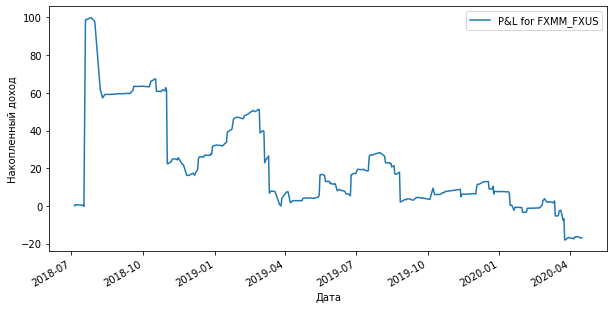

In [36]:
df.cumpnl.plot(label='P&L for FXMM_FXUS', figsize=(10,5))  
plt.xlabel('Дата')  
plt.ylabel('Накопленный доход')  
plt.legend()  
plt.show()

In [37]:
df.tail(10)

,Price,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,short_entry,short_exit,positions_long,positions_short,positions,prices_difference,daily_returns,pnl,cumpnl
TRADEDATE,,,,,,,,,,,,,,,,
2020-03-31,-105.973438,41.437211,176.869372,129.871896,-46.997475,True,False,False,True,1.0,0.0,1.0,23.381545,-0.180755,-0.180755,-16.981338
2020-04-06,-55.977738,7.317394,175.673023,95.153905,-80.519118,False,False,False,True,1.0,0.0,1.0,49.995700,-0.471776,-0.471776,-17.453114
2020-04-07,-109.669096,-19.528068,182.502906,71.723384,-110.779521,False,False,False,True,1.0,0.0,1.0,-53.691358,0.959156,0.959156,-16.493958
2020-04-08,-101.874524,-100.569956,27.068144,-87.035884,-114.104028,False,False,False,True,1.0,0.0,1.0,7.794572,-0.071074,-0.071074,-16.565032
2020-04-09,-113.432144,-97.385388,23.541922,-85.614427,-109.156349,True,False,False,True,1.0,0.0,1.0,-11.557620,0.113450,0.113450,-16.451582
2020-04-10,-127.453898,-101.681480,27.179804,-88.091578,-115.271382,True,False,False,True,1.0,0.0,1.0,-14.021754,0.123614,0.123614,-16.327969
2020-04-13,-80.623417,-106.610616,17.234377,-97.993427,-115.227804,False,True,True,False,0.0,-1.0,-1.0,46.830481,-0.367431,-0.367431,-16.695399
2020-04-14,-110.266925,-106.730182,17.262951,-98.098706,-115.361657,False,False,False,True,0.0,0.0,0.0,-29.643508,0.367679,-0.367679,-17.063078
2020-04-15,-124.822374,-111.319752,18.644484,-101.997510,-120.641994,True,False,False,True,1.0,0.0,1.0,-14.555449,0.132002,0.000000,-17.063078


In [38]:
round(df.cumpnl[-1]*100,2)

-1700.2